<a href="https://colab.research.google.com/github/Thiraput01/Dig_img/blob/main/homework2_6530143721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #2

* copy this file into your drive
```
File -> Save a copy in Drive
```
* write the code in the cells provided for each questions
* <font color="red"> DO NOT DELETE or MODIFY </font> the first line of each cell (will be used to mark your homework, otherwise you will get 0)
* <font color="red"> DO NOT DELETE or MODIFY </font> function name, function input, and function output (return). Otherwise, you will get 0.
* <font color="red"> DO NOT ADD </font> anything outside the function (of the homeworkx_x cells). Otherwise, you will get 0.
* Make sure homework2_1-2_3 can run properly and can be tested with any image (not rely just on your images); otherwise, your homework will not be marked.


In [1]:
!wget https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL  -O kitty55.png
!wget https://drive.google.com/uc?id=1_-_yN30miNhzR9ZC5DHTiljH6LVq4hZz  -O clean_cat.png
!wget https://drive.google.com/uc?id=1LEwFRI2vjSqQEd68lYwyuJ4JyJYPQX2m  -O blurry_noisy_cat.png
!wget https://drive.google.com/uc?id=1lnO_PK81O54bLBUprBlo8-2x9smWYDcP  -O moodeng.jpg

--2024-10-03 08:30:45--  https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.google.com (drive.google.com)... 108.177.96.139, 108.177.96.102, 108.177.96.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.96.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL [following]
--2024-10-03 08:30:45--  https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.69.132, 2a00:1450:4013:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.69.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112875 (110K) [image/png]
Saving to: ‘kitty55.png’

kitty55.png         100%[===================>] 110.23K  --.-KB/s    in 0.002s  

2024-10-03 08:30:48 (70.3 MB/s) - ‘kitty55.png’ sa

In [104]:
# homework2_1 --> do not modify/delete this first line and do not add anything before this line

# import library for 2.1
import cv2
import numpy as np
import matplotlib.pyplot as plt
# you can add more library here


def homework2_1(gray_image):
    # input -> gray_image - type -> np.ndarray, size of - (height, width) with dtype - uint8
    # output -> filtered_image - Filtered images (P_T > 99%) - type -> np.ndarray, size of - (height, width) with dtype - uint8


    # TO DO : Apply a Gaussian low pass filter with minimum cutoff frequency (C) maintaining the image power > 99%
    filtered_image = np.zeros_like(gray_image)

    # prepare shape, gaussian filter function
    M, N = gray_image.shape
    def gaussian_low_pass_filter(cutoff):
      center_x, center_y = M // 2, N // 2
      x, y = np.ogrid[:M, :N]
      distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
      filter_mask = np.exp(-(distance**2) / (2 * (cutoff**2)))
      return filter_mask


    # 1. performs fft
    gray_image_fft = np.fft.fft2(gray_image)
    gray_image_fft_shift = np.fft.fftshift(gray_image_fft)
    magnitude_spectrum = 20*np.log(np.abs(gray_image_fft_shift))
    plt.imshow(magnitude_spectrum,cmap='gray')
    plt.title('Fourier Spectrum')
    plt.show()

    # 2. calculate the total image power (P_T)
    P_T = np.sum(np.abs(gray_image_fft_shift)**2)

    # 3. linear search to find minimum cutoff that retains > 99% power
    cutoff_frequencies = np.arange(1, min(M, N) // 2, 1)
    required_percentage = 99
    min_cutoff = 0
    power_retained = 0

    for cutoff in cutoff_frequencies:
      # 3.1 apply gaussian filter
      gaussian_filter = gaussian_low_pass_filter(cutoff)
      filtered_fft = gray_image_fft_shift * gaussian_filter

      # 3.2 Compute the total power of the filtered image (P_T^f)
      P_T_f = np.sum(np.abs(filtered_fft)**2)

      # 3.3 Calculate the percentage of power retained
      power_retained = (P_T_f / P_T) * 100

      # 3.4 If power retained is more than 99%, break the loop and store the cutoff
      if power_retained > required_percentage:
          min_cutoff = cutoff
          break

    # 4. apply gaussian filter to the image
    gaussian_filter = gaussian_low_pass_filter(min_cutoff)
    filtered_fft = gray_image_fft_shift * gaussian_filter
    # 4.1 show spectrum of filtered fft
    magnitude_spectrum_filtered = 20*np.log(np.abs(gray_image_fft_shift))
    plt.imshow(magnitude_spectrum_filtered,cmap='gray')
    plt.title('Fourier Spectrum of filtered image')
    plt.show()

    # 5. inverse fft
    filtered_fft_shift = np.fft.ifftshift(filtered_fft)
    filtered_image = np.fft.ifft2(filtered_fft_shift)
    filtered_image = np.abs(filtered_image)

    # Clip the values to uint8 range and convert to uint8
    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

    print('Cut off frequency is', min_cutoff)
    print('Alpla is', power_retained)
    return filtered_image



# Do not add anything outside the function in the submission

In [105]:
# homework2_2 --> do not modify/delete this first line and do not add anything before this line
# import library for 2.2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration
from skimage.metrics import structural_similarity as ssim


def homework2_2(org_image,blur_image):
    # input -> org_image - a grayscale image with type -> np.ndarray, size of - (height, width) with dtype - uint8
    #       -> blur_image - a degraded image with type -> np.ndarray, size of - (height, width) with dtype - uint8
    # output -> restored_image - restored image (grayscale) using wiener filter - type -> np.ndarray, size of - (height, width) with dtype - uint8
    #         -> SSIM - compared image

    # TO DO - Restore an image using wiener filter
    restored_image = np.zeros_like(org_image)
    SSIM = 0
    K = 0.035

    # 1. define gaussian psf
    def gaussian_psf(size, sigma=1):
        x = np.linspace(-size//2, size//2, size)
        y = np.linspace(-size//2, size//2, size)
        x, y = np.meshgrid(x, y)
        psf = np.exp(-(x**2 + y**2) / (2 * sigma**2))
        psf /= psf.sum()
        return psf

    psf = gaussian_psf(size=4, sigma=2.5)

    # 2. restore the image
    restored_image = restoration.wiener(blur_image / 255, psf=psf, balance=K)

    # 3. normalise the restored image
    restored_image = np.clip(restored_image, 0, 1)
    restored_image = (restored_image * 255).astype(np.uint8)

    # 4. calculate SSIM
    SSIM = ssim(org_image, restored_image)
    SSIM_standard = ssim(org_image, blur_image)

    print('SSIM boundary is', SSIM_standard)
    print('SSIM of restored image is', SSIM)
    return restored_image, SSIM


# Do not add anything outside the function in the submission

In [106]:
!pip install PyWavelets

In [107]:
# homework2_3 --> do not modify/delete this first line and do not add anything before this line
# import library for 2.3
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
# you can add more library here



def homework2_3(rgb_image):
  # input -> rgb_image - type -> np.ndarray, size of - (height, width,3) with dtype - uint8
  # output -> blur_image - half blur image in Grayscale or RGB colors



  # TO DO : generate and return the right half blur image using Wavelet
  half_blur_image = np.zeros_like(rgb_image)

  # 0. seperate channels for red, green, blue
  red = rgb_image[:,:,0]
  green = rgb_image[:,:,1]
  blue = rgb_image[:,:,2]
  channels = [red, green, blue]

  curRed = red
  curGreen = green
  curBlue = blue

  j_1_LL = None
  j_1_LH = None
  j_1_HL = None
  j_1_HH = None

  # 1. for each level, performs a dwt
  for j in range(3):
    LL_r, (LH_r, HL_r, HH_r) = pywt.dwt2(curRed, 'haar')
    LL_g, (LH_g, HL_g, HH_g) = pywt.dwt2(curGreen, 'haar')
    LL_b, (LH_b, HL_b, HH_b) = pywt.dwt2(curBlue, 'haar')

    # 1.1 reconstruct the image back to rgb
    rgb_LL = np.stack([LL_r, LL_g, LL_b], axis=-1)
    rgb_LL = np.clip(rgb_LL, 0, 255).astype(np.uint8)

    rgb_LH = np.stack([LH_r, LH_g, LH_b], axis=-1)
    rgb_LH = np.clip(rgb_LH, 0, 255).astype(np.uint8)

    rgb_HL = np.stack([HL_r, HL_g, HL_b], axis=-1)
    rgb_HL = np.clip(rgb_HL, 0, 255).astype(np.uint8)

    rgb_HH = np.stack([HH_r, HH_g, HH_b], axis=-1)
    rgb_HH = np.clip(rgb_HH, 0, 255).astype(np.uint8)

    # 1.2 collects the information for next iteration
    curRed = LL_r
    curGreen = LL_g
    curBlue = LL_b

    # 1.3 store the level j-1 for problem 3.2
    if j == 0:
      j_1_LL = rgb_LL
      j_1_LH = rgb_LH
      j_1_HL = rgb_HL
      j_1_HH = rgb_HH

    # 1.4 show results
    plt.figure(figsize=(12, 8))
    plt.subplot(141), plt.imshow(rgb_LL, cmap='gray'), plt.title(f'LL{j+1}')
    plt.subplot(142), plt.imshow(rgb_LH, cmap='gray'), plt.title(f'LH{j+1}')
    plt.subplot(143), plt.imshow(rgb_HL, cmap='gray'), plt.title(f'HL{j+1}')
    plt.subplot(144), plt.imshow(rgb_HH, cmap='gray'), plt.title(f'HH{j+1}')
    plt.show()

  # 2 half blur mask
  LL_r, LL_g, LL_b = j_1_LL[:,:,0], j_1_LL[:,:,1], j_1_LL[:,:,2]
  LH_r, LH_g, LH_b = j_1_LH[:,:,0], j_1_LH[:,:,1], j_1_LH[:,:,2]
  HL_r, HL_g, HL_b = j_1_HL[:,:,0], j_1_HL[:,:,1], j_1_HL[:,:,2]
  HH_r, HH_g, HH_b = j_1_HH[:,:,0], j_1_HH[:,:,1], j_1_HH[:,:,2]

  height, width = LH_r.shape
  LH_r[:, width // 2:] = 0
  LH_g[:, width // 2:] = 0
  LH_b[:, width // 2:] = 0

  HL_r[:, width // 2:] = 0
  HL_g[:, width // 2:] = 0
  HL_b[:, width // 2:] = 0

  HH_r[:, width // 2:] = 0
  HH_g[:, width // 2:] = 0
  HH_b[:, width // 2:] = 0

  # 3. Reconstruct the image
  modified_coeffs_r = (LL_r, (LH_r, HL_r, HH_r))
  blurred_image_r = pywt.idwt2(modified_coeffs_r, 'haar')

  modified_coeffs_g = (LL_g, (LH_g, HL_g, HH_g))
  blurred_image_g = pywt.idwt2(modified_coeffs_g, 'haar')

  modified_coeffs_b = (LL_b, (LH_b, HL_b, HH_b))
  blurred_image_b = pywt.idwt2(modified_coeffs_b, 'haar')

  # 4. combine channels
  half_blur_image = np.stack([blurred_image_r, blurred_image_g, blurred_image_b], axis=-1)
  half_blur_image = np.clip(half_blur_image, 0, 255).astype(np.uint8)

  return half_blur_image

# Do not add anything outside the function in the submission

# Test our function here

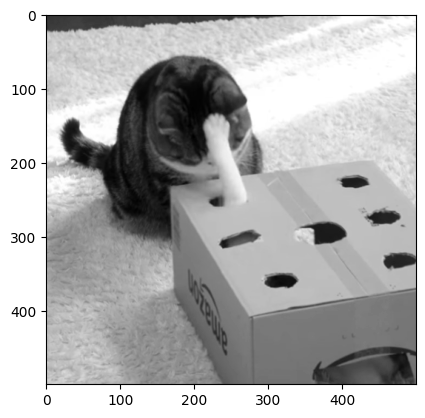

In [108]:
img = cv2.imread('kitty55.png',0)
plt.imshow(img,cmap='gray')
plt.show()

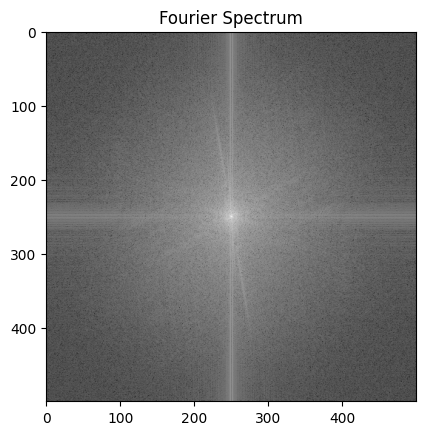

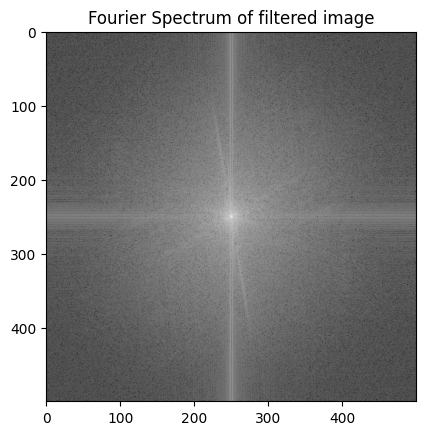

Cut off frequency is 27
Alpla is 99.01590767196541


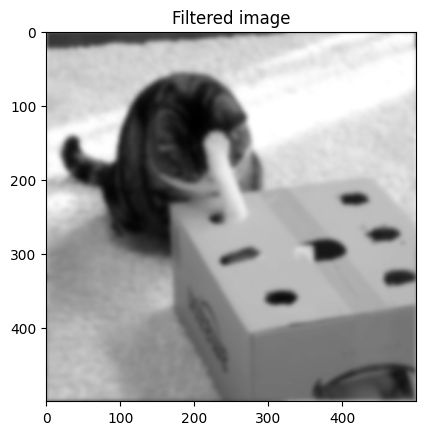

In [109]:
# test homework2_1
img = cv2.imread('kitty55.png',0)
out = homework2_1(img)
plt.imshow(out,cmap='gray')
plt.title('Filtered image')
plt.show()


SSIM boundary is 0.7690490236984359
SSIM of restored image is 0.8146014149920263


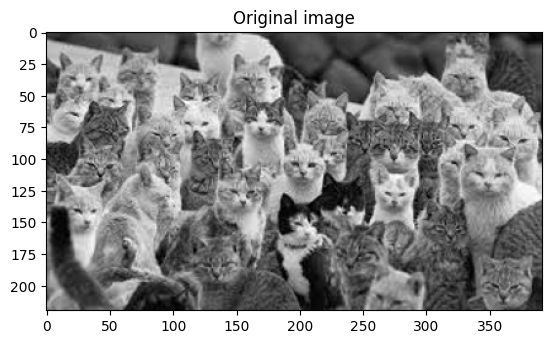

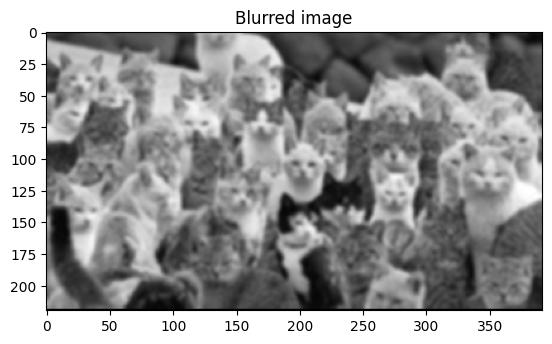

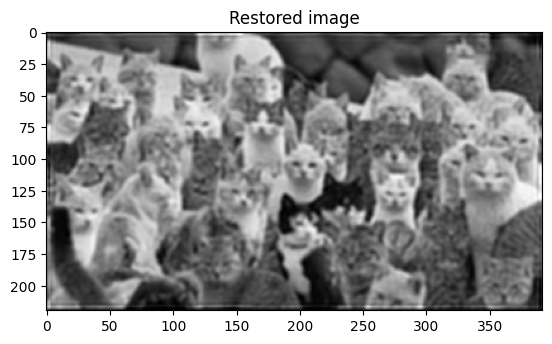

In [112]:
# test homework2_2
org_image = cv2.imread("clean_cat.png",0)
blur_image = cv2.imread("blurry_noisy_cat.png",0)
restored_image, SSIM = homework2_2(org_image,blur_image)
plt.imshow(org_image,cmap='gray')
plt.title('Original image')
plt.show()
plt.imshow(blur_image,cmap='gray')
plt.title('Blurred image')
plt.show()
plt.imshow(restored_image,cmap='gray')
plt.title('Restored image')
plt.show()

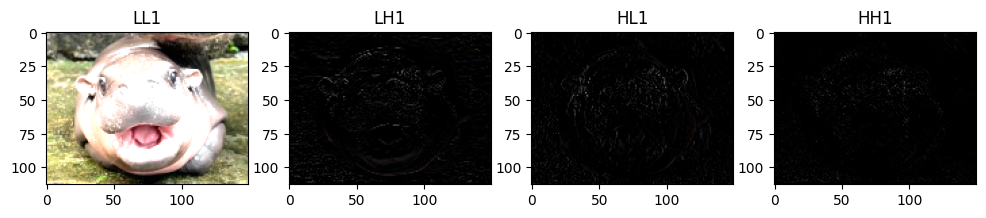

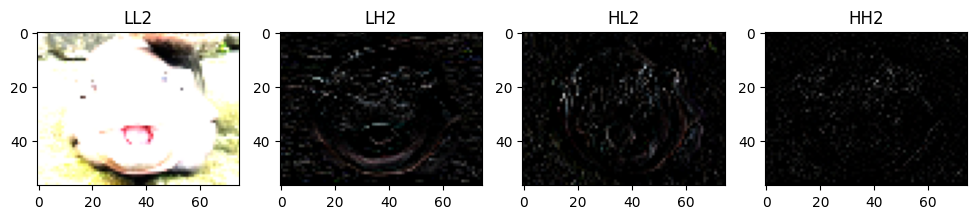

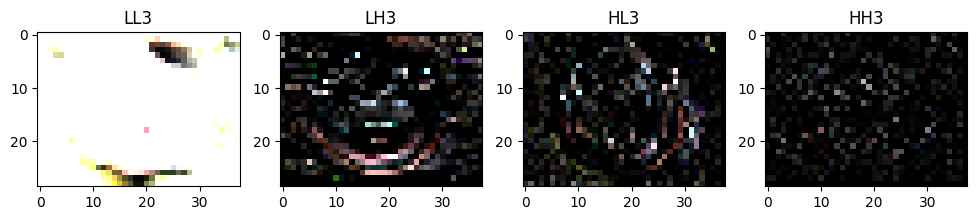

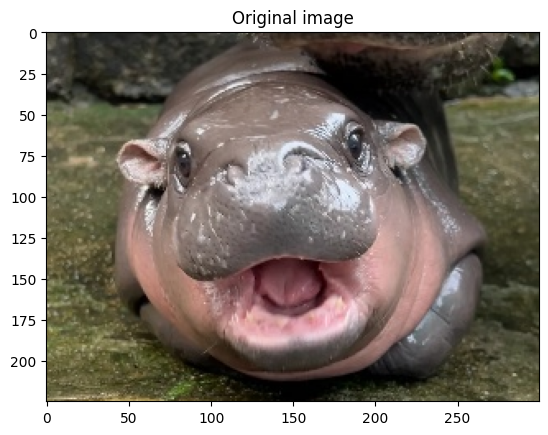

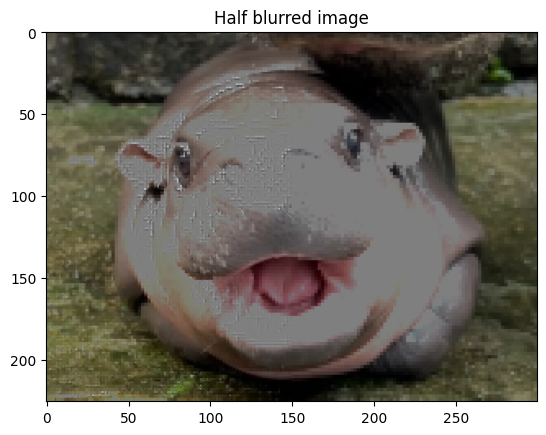

In [111]:
# test homework2_3
rgb = cv2.imread("moodeng.jpg")
blur_image = homework2_3(rgb[:,:,::-1])
plt.imshow(rgb[:,:,::-1])
plt.title('Original image')
plt.show()
plt.imshow(blur_image,cmap='gray')
plt.title('Half blurred image')
plt.show()